In [1]:
import pandas as pd
import mlflow
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load all mlflow experiments and run data
experiments = mlflow.search_experiments()

In [3]:
# Extract runs from a specific experiment
# experiments[0].experiment_id

experiment_id = '870565023039204259'
runs = mlflow.search_runs(experiment_ids=[experiment_id])


## Loading cost matrix

In [5]:

RUN_ID = runs[runs["tags.mlflow.runName"]=="honorable-grouse-425"].run_id.iloc[0]
EXPERIMENT_ID = '870565023039204259'
artifact_filename = "personalized_weight_matrix.json" 

artifact_uri = f"../mlruns/{EXPERIMENT_ID}/{RUN_ID}/artifacts/{artifact_filename}"
print(f"Artifact URI: {artifact_uri}")
loaded_data = mlflow.artifacts.load_dict(artifact_uri)
personalized_weight_matrix = np.array(loaded_data)
personalized_weight_matrix

Artifact URI: ../mlruns/870565023039204259/88937ae1bdcc48eb932f142cba876bae/artifacts/personalized_weight_matrix.json


array([[ 1., -1., -2., -2., -2., -2., -2., -2., -1., -1.],
       [-1.,  1., -2., -2., -2., -2., -2., -2., -1., -1.],
       [-2., -2.,  1.,  0.,  0.,  0.,  0.,  0., -2., -2.],
       [-2., -2.,  0.,  1.,  0.,  0.,  0.,  0., -2., -2.],
       [-2., -2.,  0.,  0.,  1.,  0.,  0.,  0., -2., -2.],
       [-2., -2.,  0.,  0.,  0.,  1.,  0.,  0., -2., -2.],
       [-2., -2.,  0.,  0.,  0.,  0.,  1.,  0., -2., -2.],
       [-2., -2.,  0.,  0.,  0.,  0.,  0.,  1., -2., -2.],
       [-1., -1., -2., -2., -2., -2., -2., -2.,  1., -1.],
       [-1., -1., -2., -2., -2., -2., -2., -2., -1.,  1.]])

## Accuracy v accuracy

In [6]:
RUN_ID = runs[runs["tags.mlflow.runName"]=="painted-turtle-210"].run_id.iloc[0]
client = mlflow.MlflowClient()
run = client.get_run(RUN_ID)

metrics_history = {}
for metric in run.data.metrics.keys():
    metric_history = client.get_metric_history(run_id=RUN_ID, key=metric)
    metrics_history[metric] = [metric_history.value for metric_history in metric_history]
metrics_history_df = pd.DataFrame(metrics_history)
metrics_history_df['epoch'] = metrics_history_df.index + 1

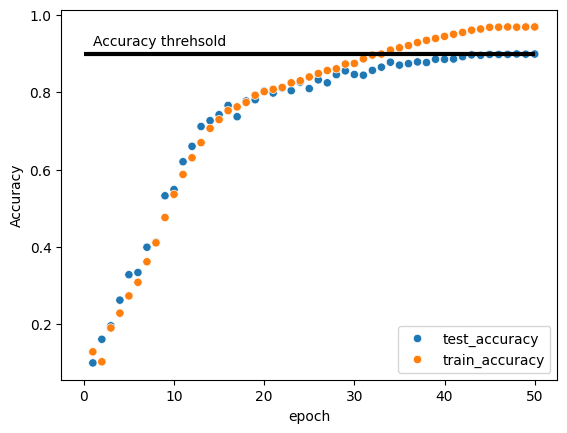

In [7]:
short_metrics_history_df = metrics_history_df.melt(id_vars=['epoch'], var_name='metric', value_name='value')
g = sns.scatterplot(data=short_metrics_history_df[short_metrics_history_df.metric.str.contains('accuracy')], x='epoch', y='value', hue='metric')
plt.hlines(xmin=0, xmax=short_metrics_history_df.epoch.max(), y=0.9, color='black', linewidth=3)
g.set_ylabel('Accuracy')
g.text(1, 0.92, 'Accuracy threhsold', color='black')
g.legend(loc='lower right')

## Accuracy v cost-based accuracy

In [8]:
run_names = ['honorable-grouse-425', 'masked-hawk-571', 'indecisive-finch-168', 'intelligent-hawk-589']
# RUN_ID = runs[runs["tags.mlflow.runName"]=="indecisive-finch-168"].run_id.iloc[0]
RUN_ID = runs[runs["tags.mlflow.runName"]==run_names[0]].run_id.iloc[0]

client = mlflow.MlflowClient()
run = client.get_run(RUN_ID)

metrics_history = {}
for metric in run.data.metrics.keys():
    metric_history = client.get_metric_history(run_id=RUN_ID, key=metric)
    metrics_history[metric] = [metric_history.value for metric_history in metric_history]
metrics_history_df = pd.DataFrame(metrics_history)
metrics_history_df['epoch'] = metrics_history_df.index + 1

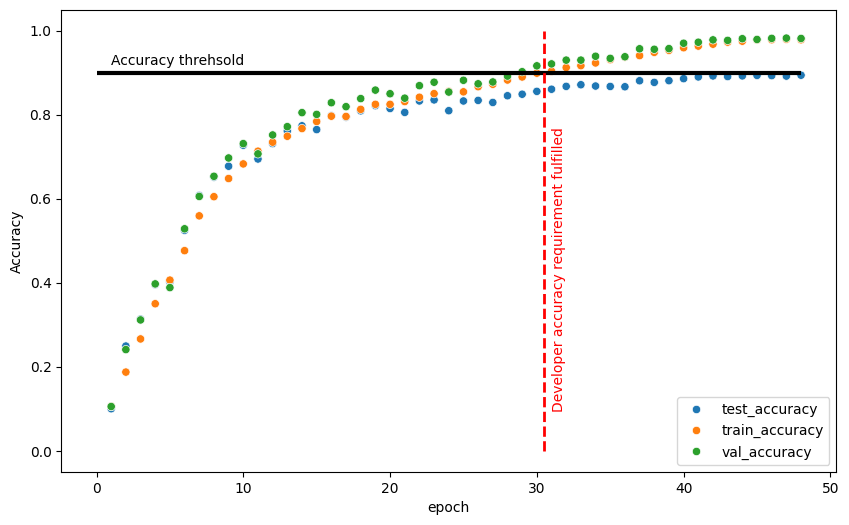

In [9]:
short_metrics_history_df = metrics_history_df.melt(id_vars=['epoch'], var_name='metric', value_name='value')
accuracy_only = ['train_accuracy', 'val_accuracy', 'test_accuracy']
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.scatterplot(data=short_metrics_history_df[short_metrics_history_df.metric.isin(accuracy_only)], x='epoch', y='value', hue='metric', ax=ax)
plt.hlines(xmin=0, xmax=short_metrics_history_df.epoch.max(), y=0.9, color='black', linewidth=3)
plt.vlines(x=30.5, ymin=0, ymax=1, color='red', linestyle='--', linewidth=2)
g.set_ylabel('Accuracy')
g.text(1, 0.92, 'Accuracy threhsold', color='black')
g.text(31, 0.1, 'Developer accuracy requirement fulfilled', color='red', rotation=90)
g.legend(loc='lower right')

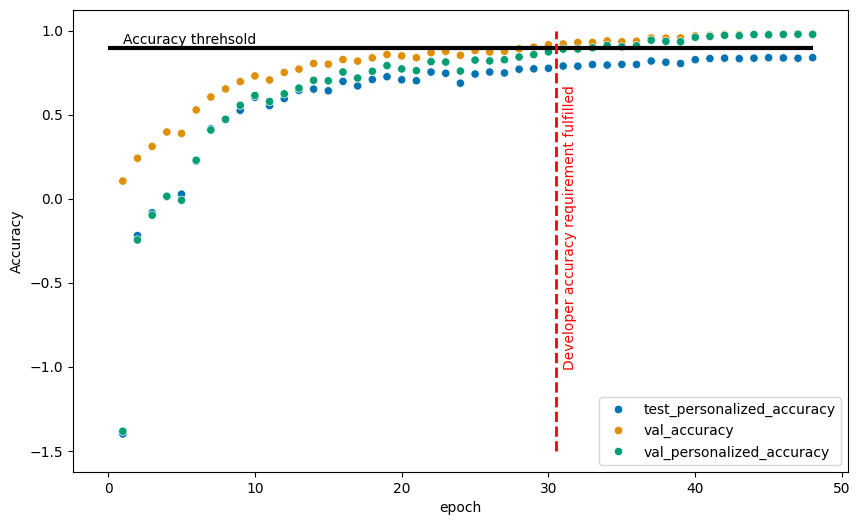

In [12]:
short_metrics_history_df = metrics_history_df.melt(id_vars=['epoch'], var_name='metric', value_name='value')
metrics = ['val_accuracy', 'val_personalized_accuracy', 'test_personalized_accuracy']
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.scatterplot(data=short_metrics_history_df[short_metrics_history_df.metric.isin(metrics)], x='epoch', y='value', hue='metric', ax=ax, palette='colorblind')
plt.hlines(xmin=0, xmax=short_metrics_history_df.epoch.max(), y=0.9, color='black', linewidth=3)
plt.vlines(x=30.5, ymin=-1.5, ymax=1, color='red', linestyle='--', linewidth=2)



g.set_ylabel('Accuracy')
g.text(1, 0.92, 'Accuracy threhsold', color='black')
g.text(31, -1, 'Developer accuracy requirement fulfilled', color='red', rotation=90)
g.legend(loc='lower right')

# Loading data

In [28]:
# Load torchvision CIFAR
import torchvision
cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

 48%|████████████████████████████████████████████████████████████████████████▊                                                                               | 81625088/170498071 [02:38<02:52, 515397.65it/s]


KeyboardInterrupt: 

In [ ]:
cifar10.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


# Loading model

In [ ]:
# TODO: check whether model loading works better when loading the actual model

In [ ]:
artifacts = mlflow.artifacts.list_artifacts(run_id=RUN_ID)

In [ ]:
model_uri = f"runs:/{RUN_ID}/model-epoch-5"
model = mlflow.pytorch.load_model(model_uri)

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model

VGGBase(
  (layer_blocks): ModuleList(
    (0): ModuleList(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): ModuleList(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (2): ModuleList(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-3): 3 x Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (3): ModuleList(
      (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1-3): 3 x Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (4): ModuleList(
      (0-3): 4 x Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (activation_blocks): ModuleList(
    (0-1): 2 x ModuleList(
      (0-1): 2 x ReLU(inplace=True)
 